In [2]:
import sys
if 'google.colab' in sys.modules:
   !pip install koreanize_matplotlib konlpy gensim

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from konlpy.tag import Okt
from gensim.models import Word2Vec
from collections import Counter

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, GlobalMaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Conv1D
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [1]:
df=pd.read_csv("./emergency_call_binary.csv", encoding="utf-8-sig")
df.head()


NameError: name 'pd' is not defined

In [5]:
padding_len = 32
embedding_dim = 1024

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['document'].apply(lambda x: ' '.join(x)))

sequences = tokenizer.texts_to_sequences(df['document'].apply(lambda x: ' '.join(x)))

X = pad_sequences(sequences, maxlen=padding_len, padding='post')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['label'])
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (300, 32), y shape: (300,)


In [7]:
vocab_size = len(tokenizer.word_index) + 1
print(f"vocab_size: {vocab_size}")
print(f"max index in sequences: {np.max(X)}")

vocab_size: 366
max index in sequences: 365


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

hidden_units = 64

d1= 128
d2= 64
drop_rate = 0.3

In [9]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=padding_len),

    GRU(hidden_units, return_sequences=False),  # RNN 유닛 수는 필요시 조정 가능
    Dense(d1, activation='relu'),

    Dense(d2, activation='relu'),
    Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop], verbose=1)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.4533 - loss: 0.7060 - val_accuracy: 0.4583 - val_loss: 0.8419
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6215 - loss: 0.6861 - val_accuracy: 0.4583 - val_loss: 0.7138
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.6501 - loss: 0.6677 - val_accuracy: 0.4583 - val_loss: 0.7124
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.6098 - loss: 0.6789 - val_accuracy: 0.5000 - val_loss: 0.7801
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.6058 - loss: 0.6792 - val_accuracy: 0.5000 - val_loss: 0.7087
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6531 - loss: 0.6369 - val_accuracy: 0.6250 - val_loss: 0.6506
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7749 - loss: 0.5518 - val_accuracy: 0.7083 - val_loss: 0.6195
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8546 - loss: 0.3402 - val_accuracy: 0.7083 - val_loss: 0.6

In [11]:
choice = 'gru'

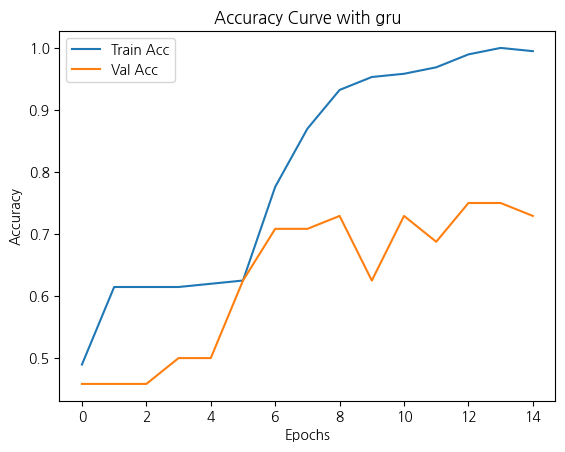

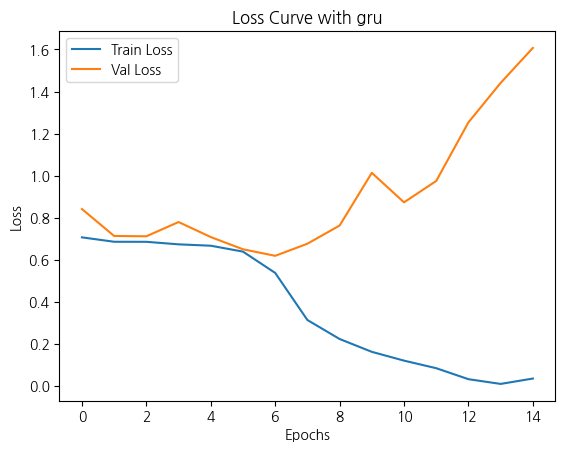

Test Accuracy of gru: 0.7167, Loss: 0.5985


In [12]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title(f"Accuracy Curve with {choice}")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Loss Curve with {choice}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 최종 평가
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy of {choice}: {acc:.4f}, Loss: {loss:.4f}")